# Pathway Enrichment Analysis 
Using KEGG analysis to explore enriched pathways from DMGs identified in pairwise comparisons with HC (hypoxic control) 

#### load and prep data frames

In [1]:
# loading libraries
library(topGO)
library(KEGGREST)
library(dplyr)
library(clusterProfiler)
library(ggridges)
library(ggplot2)
library(httr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: graph

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: GO.db

Loading required package: AnnotationDbi

Loading required package: stats4

Load

In [2]:
# importing csv files

#1 control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

#2 control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')


# All sig. DMGs for pairwise comparisons
functional analysis for all genes in a pairwise comparison that were identified as sig. DM

## control control vs. hypoxic control
CC vs. HC

In [3]:
head(CC_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,-0.04195790,0.2300421,0,1,NA
2,LOC111109452,1.5973302,-0.09288309,0.2529871,0,1,NA
3,LOC111124802,213.0013054,0.06672759,0.1192547,0,1,1
4,LOC111101273,76.7130208,-0.20267259,0.1576994,0,1,1
5,LOC111101250,123.4748149,-0.13501125,0.1799700,0,1,1
6,LOC111101262,269.4443993,0.14318006,0.1234759,0,1,1


formatting the df as needed to run KEGG

In [4]:
# selecting columns I need
cc_hc <- select(CC_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
cc_hc$X <- substr(cc_hc$X, start = 4, stop = nchar(cc_hc$X))

# renaming columns
colnames(cc_hc) <- c('gene', 'lfc', 'padj')

head(cc_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111120752,-0.04195790,NA
2,111109452,-0.09288309,NA
3,111124802,0.06672759,1
4,111101273,-0.20267259,1
5,111101250,-0.13501125,1
6,111101262,0.14318006,1


In [5]:
# creating numeric vector for kegg object
CC_kegg_gene_list <- cc_hc$lfc # log fold change
names(CC_kegg_gene_list) <- cc_hc$gene

# omitting anything with NA in a cell
CC_kegg_gene_list <- na.omit(CC_kegg_gene_list)

# sort list in descending order by fold change
CC_kegg_gene_list = sort(CC_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(CC_kegg_gene_list)
class(CC_kegg_gene_list)

111129122 111100699 111130929 111129146 111136327 111130870 
 1.893684  1.429007  1.418989  1.395451  1.394858  1.381530

[1] "numeric"

now that my gene list looks okay - running KEGG

In [6]:
kegg_organism = 'cvn'
CC_kk2 <- gseKEGG(geneList = CC_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [7]:
CC_kk2_df <- as.data.frame(CC_kk2)
CC_kk2_df$Description <- sub(" -.*", "", CC_kk2_df$Description)
head(CC_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,0.7847989,1.929458,0.000772683,0.09426733,0.09426733,1855,"tags=73%, list=14%, signal=63%",111113990/111115744/111127642/111136066/111123661/111107112/111115745/111136438
cvn00310,cvn00310,Lysine degradation,31,-0.5216369,-1.590845,0.013870181,0.68907563,0.68907563,1860,"tags=32%, list=14%, signal=28%",111130627/111109254/111115614/111130119/111121380/111125659/111107127/111110608/111112920/111128625
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,0.5444173,1.570217,0.051453532,0.68907563,0.68907563,2069,"tags=44%, list=15%, signal=38%",111113990/111115744/111129730/111136066/111107112/111115745/111136438/111131209
cvn00591,cvn00591,Linoleic acid metabolism,11,0.6158160,1.514007,0.054447833,0.68907563,0.68907563,3475,"tags=55%, list=26%, signal=41%",111127642/111123661/111127589/111127588/111121119/111111230
cvn00500,cvn00500,Starch and sucrose metabolism,22,-0.5121460,-1.438492,0.060000000,0.68907563,0.68907563,798,"tags=50%, list=6%, signal=47%",111102836/111110551/111135700/111101224/111125502/111129461/111135290/111137764/111099882/111100475/111118006
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,57,-0.4211890,-1.437853,0.043179701,0.68907563,0.68907563,3013,"tags=39%, list=22%, signal=30%",111103436/111122686/111102690/111134591/111123620/111119396/111128896/111123381/111112561/111102803/111105066/111110086/111119458/111125104/111128153/111121480/111132055/111119695/111128265/111120056/111128132/111133163


In [45]:
top10_CC <- head(CC_kk2_df[order(CC_kk2_df$pvalue), ], 10)
top10_CC

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,0.7847989,1.929458,0.000772683,0.09426733,0.09426733,1855,"tags=73%, list=14%, signal=63%",111113990/111115744/111127642/111136066/111123661/111107112/111115745/111136438
cvn00310,cvn00310,Lysine degradation,31,-0.5216369,-1.590845,0.013870181,0.68907563,0.68907563,1860,"tags=32%, list=14%, signal=28%",111130627/111109254/111115614/111130119/111121380/111125659/111107127/111110608/111112920/111128625
cvn04146,cvn04146,Peroxisome,77,0.3366598,1.343917,0.041689923,0.68907563,0.68907563,2389,"tags=34%, list=18%, signal=28%",111135891/111113990/111115744/111135288/111104085/111130560/111136066/111117608/111136587/111107112/111107850/111107491/111121658/111135201/111137185/111115745/111107606/111110283/111132335/111136438/111135419/111128430/111131209/111107393/111108762/111108763
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,57,-0.4211890,-1.437853,0.043179701,0.68907563,0.68907563,3013,"tags=39%, list=22%, signal=30%",111103436/111122686/111102690/111134591/111123620/111119396/111128896/111123381/111112561/111102803/111105066/111110086/111119458/111125104/111128153/111121480/111132055/111119695/111128265/111120056/111128132/111133163
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,0.5444173,1.570217,0.051453532,0.68907563,0.68907563,2069,"tags=44%, list=15%, signal=38%",111113990/111115744/111129730/111136066/111107112/111115745/111136438/111131209
cvn00270,cvn00270,Cysteine and methionine metabolism,43,-0.4343565,-1.398546,0.053272451,0.68907563,0.68907563,1458,"tags=30%, list=11%, signal=27%",111123773/111114474/111133693/111122141/111135193/111106176/111135192/111136621/111122163/111110831/111121023/111129934/111137596
cvn00591,cvn00591,Linoleic acid metabolism,11,0.6158160,1.514007,0.054447833,0.68907563,0.68907563,3475,"tags=55%, list=26%, signal=41%",111127642/111123661/111127589/111127588/111121119/111111230
cvn00500,cvn00500,Starch and sucrose metabolism,22,-0.5121460,-1.438492,0.060000000,0.68907563,0.68907563,798,"tags=50%, list=6%, signal=47%",111102836/111110551/111135700/111101224/111125502/111129461/111135290/111137764/111099882/111100475/111118006
cvn04150,cvn04150,mTOR signaling pathway,84,-0.3646760,-1.320863,0.064102564,0.68907563,0.68907563,2924,"tags=30%, list=22%, signal=23%",111102631/111124929/111128693/111135803/111120921/111120676/111121135/111121983/111133687/111119108/111130138/111132309/111124875/111119689/111121839/111120632/111134634/111133565/111119487/111119905/111106364/111125836/111120947/111128744/111120776


In [46]:
select(top10_CC, Description, pvalue, p.adjust)

,Description,pvalue,p.adjust
,<chr>,<dbl>,<dbl>
cvn00592,alpha-Linolenic acid metabolism,0.000772683,0.09426733
cvn00310,Lysine degradation,0.013870181,0.68907563
cvn04146,Peroxisome,0.041689923,0.68907563
cvn03008,Ribosome biogenesis in eukaryotes,0.043179701,0.68907563
cvn01040,Biosynthesis of unsaturated fatty acids,0.051453532,0.68907563
cvn00270,Cysteine and methionine metabolism,0.053272451,0.68907563
cvn00591,Linoleic acid metabolism,0.054447833,0.68907563
cvn00500,Starch and sucrose metabolism,0.060000000,0.68907563
cvn04150,mTOR signaling pathway,0.064102564,0.68907563


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [8]:
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adjust)

pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)

column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)


ERROR: Error in eval(expr, envir, enclos): object 'get_pathway_names' not found


In [9]:
CC_df <- df
head(CC_df)
write.csv(CC_df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CC_HC.csv')

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

In [10]:
CC_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CC_HC.csv')

In [11]:
# making sure R see enrichment score as a number
CC_df$enrichmentScore <- as.numeric(CC_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
CC_df$direction <- ifelse(CC_df$enrichmentScore<0, "CC", #neg ES = pathway for control
                              ifelse(CC_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(CC_df)

X,x,enrichmentScore,direction
<lgl>,<lgl>,<dbl>,<lgl>


In [12]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= CC_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Reds', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control control vs. hypoxic control",
      fill = "General Pathway")

ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pa

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

In [13]:
options(repr.plot.width=15, repr.plot.height=10)

CC_top10 <- head(CC_df[order(CC_df$p.adjust), ], 10)
CC_top10

ggplot(CC_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': argument 1 is not a vector


In [14]:
CC_top10$Description

ERROR: Error in eval(expr, envir, enclos): object 'CC_top10' not found


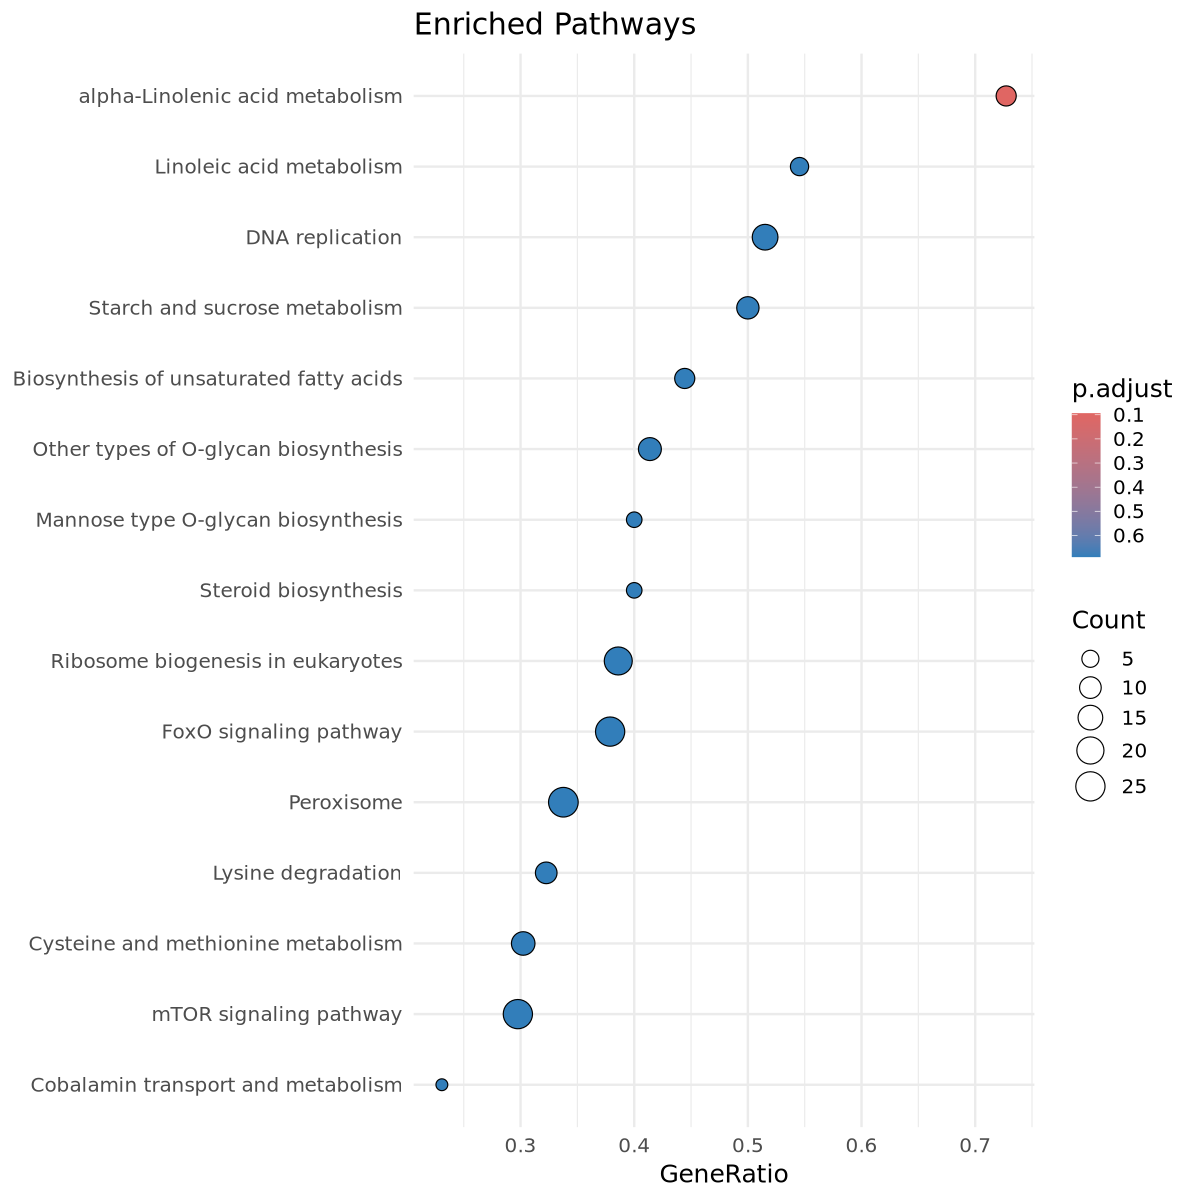

In [15]:
options(repr.plot.width=10, repr.plot.height=10)

CC_kk2@result$Description <- gsub(CC_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(CC_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance


## control hypoxic vs. hypoxic control
CH vs. HC

In [16]:
head(CH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,0.01574870,0.2293653,0,1,NA
2,LOC111109452,1.5973302,-0.02110917,0.2543295,0,1,NA
3,LOC111124802,213.0013054,0.02990042,0.1181432,0,1,1
4,LOC111101273,76.7130208,0.04883435,0.1588545,0,1,1
5,LOC111101250,123.4748149,-0.21553529,0.1788606,0,1,1
6,LOC111101262,269.4443993,-0.02049799,0.1220125,0,1,1


formatting the df as needed to run KEGG

In [17]:
# selecting columns I need
ch_hc <- select(CH_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
ch_hc$X <- substr(ch_hc$X, start = 4, stop = nchar(ch_hc$X))

# renaming columns
colnames(ch_hc) <- c('gene', 'lfc', 'padj')

head(ch_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111120752,0.01574870,NA
2,111109452,-0.02110917,NA
3,111124802,0.02990042,1
4,111101273,0.04883435,1
5,111101250,-0.21553529,1
6,111101262,-0.02049799,1


In [18]:
# creating numeric vector for kegg object
CH_kegg_gene_list <- ch_hc$lfc
names(CH_kegg_gene_list) <- ch_hc$gene

# omitting anything with NA in a cell
CH_kegg_gene_list <- na.omit(CH_kegg_gene_list)

# sort list in descending order
CH_kegg_gene_list = sort(CH_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(CH_kegg_gene_list)
class(CH_kegg_gene_list)

111131170 111128942 111121672 111115224 111133384 111135891 
 2.032191  1.815364  1.783811  1.768623  1.726581  1.723637

[1] "numeric"

now that my gene list looks okay - running KEGG

In [19]:
kegg_organism = 'cvn'
CH_kk2 <- gseKEGG(geneList = CH_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.2% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [20]:
CH_kk2_df <- as.data.frame(CH_kk2)
CH_kk2_df$Description <- sub(" -.*", "", CH_kk2_df$Description)
head(CH_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,0.5930271,1.641667,0.01343011,0.620066,0.615251,1946,"tags=33%, list=14%, signal=29%",111129730/111136438/111136066/111119293/111131209/111107112
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,0.6580772,1.604603,0.03758680,0.620066,0.615251,2321,"tags=45%, list=17%, signal=38%",111136438/111136066/111123661/111107112/111127642
cvn00450,cvn00450,Selenocompound metabolism,13,-0.6570291,-1.585982,0.02484779,0.620066,0.615251,727,"tags=31%, list=5%, signal=29%",111130865/111119950/111122141/111099623
cvn00980,cvn00980,Metabolism of xenobiotics by cytochrome P450,16,0.5629852,1.523586,0.05399762,0.620066,0.615251,750,"tags=25%, list=6%, signal=24%",111121161/111134996/111110471/111134997
cvn00270,cvn00270,Cysteine and methionine metabolism,43,-0.4700245,-1.489664,0.03006940,0.620066,0.615251,1286,"tags=28%, list=10%, signal=25%",111106176/111123773/111100699/111133693/111130865/111135192/111110831/111136621/111122141/111122163/111137596/111129934
cvn00591,cvn00591,Linoleic acid metabolism,11,0.5816608,1.418275,0.08407080,0.620066,0.615251,2321,"tags=27%, list=17%, signal=23%",111123661/111127589/111127642


In [41]:
colnames(CH_kk2_df)

[1] "ID"              "Description"     "setSize"         "enrichmentScore"
 [5] "NES"             "pvalue"          "p.adjust"        "qvalue"         
 [9] "rank"            "leading_edge"    "core_enrichment"

looking for top 10 enriched pathways - by p-value (want to recorded unadjusted *and* adjusted p-value

In [39]:
top10_CH <- head(CH_kk2_df[order(CH_kk2_df$pvalue), ], 10)
top10_CH

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,0.5930271,1.641667,0.01343011,0.620066,0.615251,1946,"tags=33%, list=14%, signal=29%",111129730/111136438/111136066/111119293/111131209/111107112
cvn04120,cvn04120,Ubiquitin mediated proteolysis,117,-0.3659198,-1.369332,0.01928532,0.620066,0.615251,2383,"tags=29%, list=18%, signal=24%",111114538/111138340/111121932/111099688/111118147/111132898/111104637/111135325/111130966/111125231/111102838/111121443/111121135/111129467/111122738/111120128/111135190/111129295/111120632/111103271/111110185/111130636/111132149/111105462/111130310/111104196/111121155/111123155/111133998/111120086/111124955/111137343/111119134/111120860
cvn00450,cvn00450,Selenocompound metabolism,13,-0.6570291,-1.585982,0.02484779,0.620066,0.615251,727,"tags=31%, list=5%, signal=29%",111130865/111119950/111122141/111099623
cvn00270,cvn00270,Cysteine and methionine metabolism,43,-0.4700245,-1.489664,0.03006940,0.620066,0.615251,1286,"tags=28%, list=10%, signal=25%",111106176/111123773/111100699/111133693/111130865/111135192/111110831/111136621/111122141/111122163/111137596/111129934
cvn01240,cvn01240,Biosynthesis of cofactors,101,0.3277115,1.291848,0.03188684,0.620066,0.615251,1837,"tags=24%, list=14%, signal=21%",111138462/111102767/111138068/111135080/111132054/111126157/111130105/111132797/111115080/111130741/111130419/111103498/111104817/111122042/111102977/111110659/111138494/111103451/111109888/111115125/111114229/111125202/111108764/111104850
cvn04146,cvn04146,Peroxisome,77,0.3595593,1.365397,0.03292883,0.620066,0.615251,2421,"tags=27%, list=18%, signal=23%",111135891/111136587/111104085/111135201/111130560/111136438/111136066/111135419/111124704/111131033/111101232/111137185/111111509/111131209/111132335/111107112/111121838/111108762/111121197/111100641/111133726
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,0.6580772,1.604603,0.03758680,0.620066,0.615251,2321,"tags=45%, list=17%, signal=38%",111136438/111136066/111123661/111107112/111127642
cvn00980,cvn00980,Metabolism of xenobiotics by cytochrome P450,16,0.5629852,1.523586,0.05399762,0.620066,0.615251,750,"tags=25%, list=6%, signal=24%",111121161/111134996/111110471/111134997
cvn03460,cvn03460,Fanconi anemia pathway,41,-0.4408978,-1.380249,0.05714286,0.620066,0.615251,2184,"tags=32%, list=16%, signal=27%",111129379/111113980/111100339/111131835/111130580/111107067/111136867/111119232/111131048/111133998/111128124/111126926/111122179


In [40]:
select(top10_CH, Description, pvalue, p.adjust)

,Description,pvalue,p.adjust
,<chr>,<dbl>,<dbl>
cvn01040,Biosynthesis of unsaturated fatty acids,0.01343011,0.620066
cvn04120,Ubiquitin mediated proteolysis,0.01928532,0.620066
cvn00450,Selenocompound metabolism,0.02484779,0.620066
cvn00270,Cysteine and methionine metabolism,0.03006940,0.620066
cvn01240,Biosynthesis of cofactors,0.03188684,0.620066
cvn04146,Peroxisome,0.03292883,0.620066
cvn00592,alpha-Linolenic acid metabolism,0.03758680,0.620066
cvn00980,Metabolism of xenobiotics by cytochrome P450,0.05399762,0.620066
cvn03460,Fanconi anemia pathway,0.05714286,0.620066


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(CH_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [21]:
CH_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CH_HC.csv')

In [22]:
# making sure R see enrichment score as a number
CH_df$enrichmentScore <- as.numeric(CH_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
CH_df$direction <- ifelse(CH_df$enrichmentScore<0, "CH", #neg ES = pathway for control
                              ifelse(CH_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(CH_df)

,X,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5930271,0.6780874,Metabolism,Lipid metabolism,HC
2,cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6580772,0.6780874,Metabolism,Lipid metabolism,HC
3,cvn00450,cvn00450,Selenocompound metabolism,-0.6570291,0.6780874,Metabolism,Metabolism of other amino acids,CH
4,cvn00980,cvn00980,Metabolism of xenobiotics by cytochrome P450,0.5629852,0.6780874,Metabolism,Xenobiotics biodegradation and metabolism,HC
5,cvn00270,cvn00270,Cysteine and methionine metabolism,-0.4700245,0.6780874,Metabolism,Amino acid metabolism,CH
6,cvn00670,cvn00670,One carbon pool by folate,-0.5313855,0.6780874,Metabolism,Metabolism of cofactors and vitamins,CH


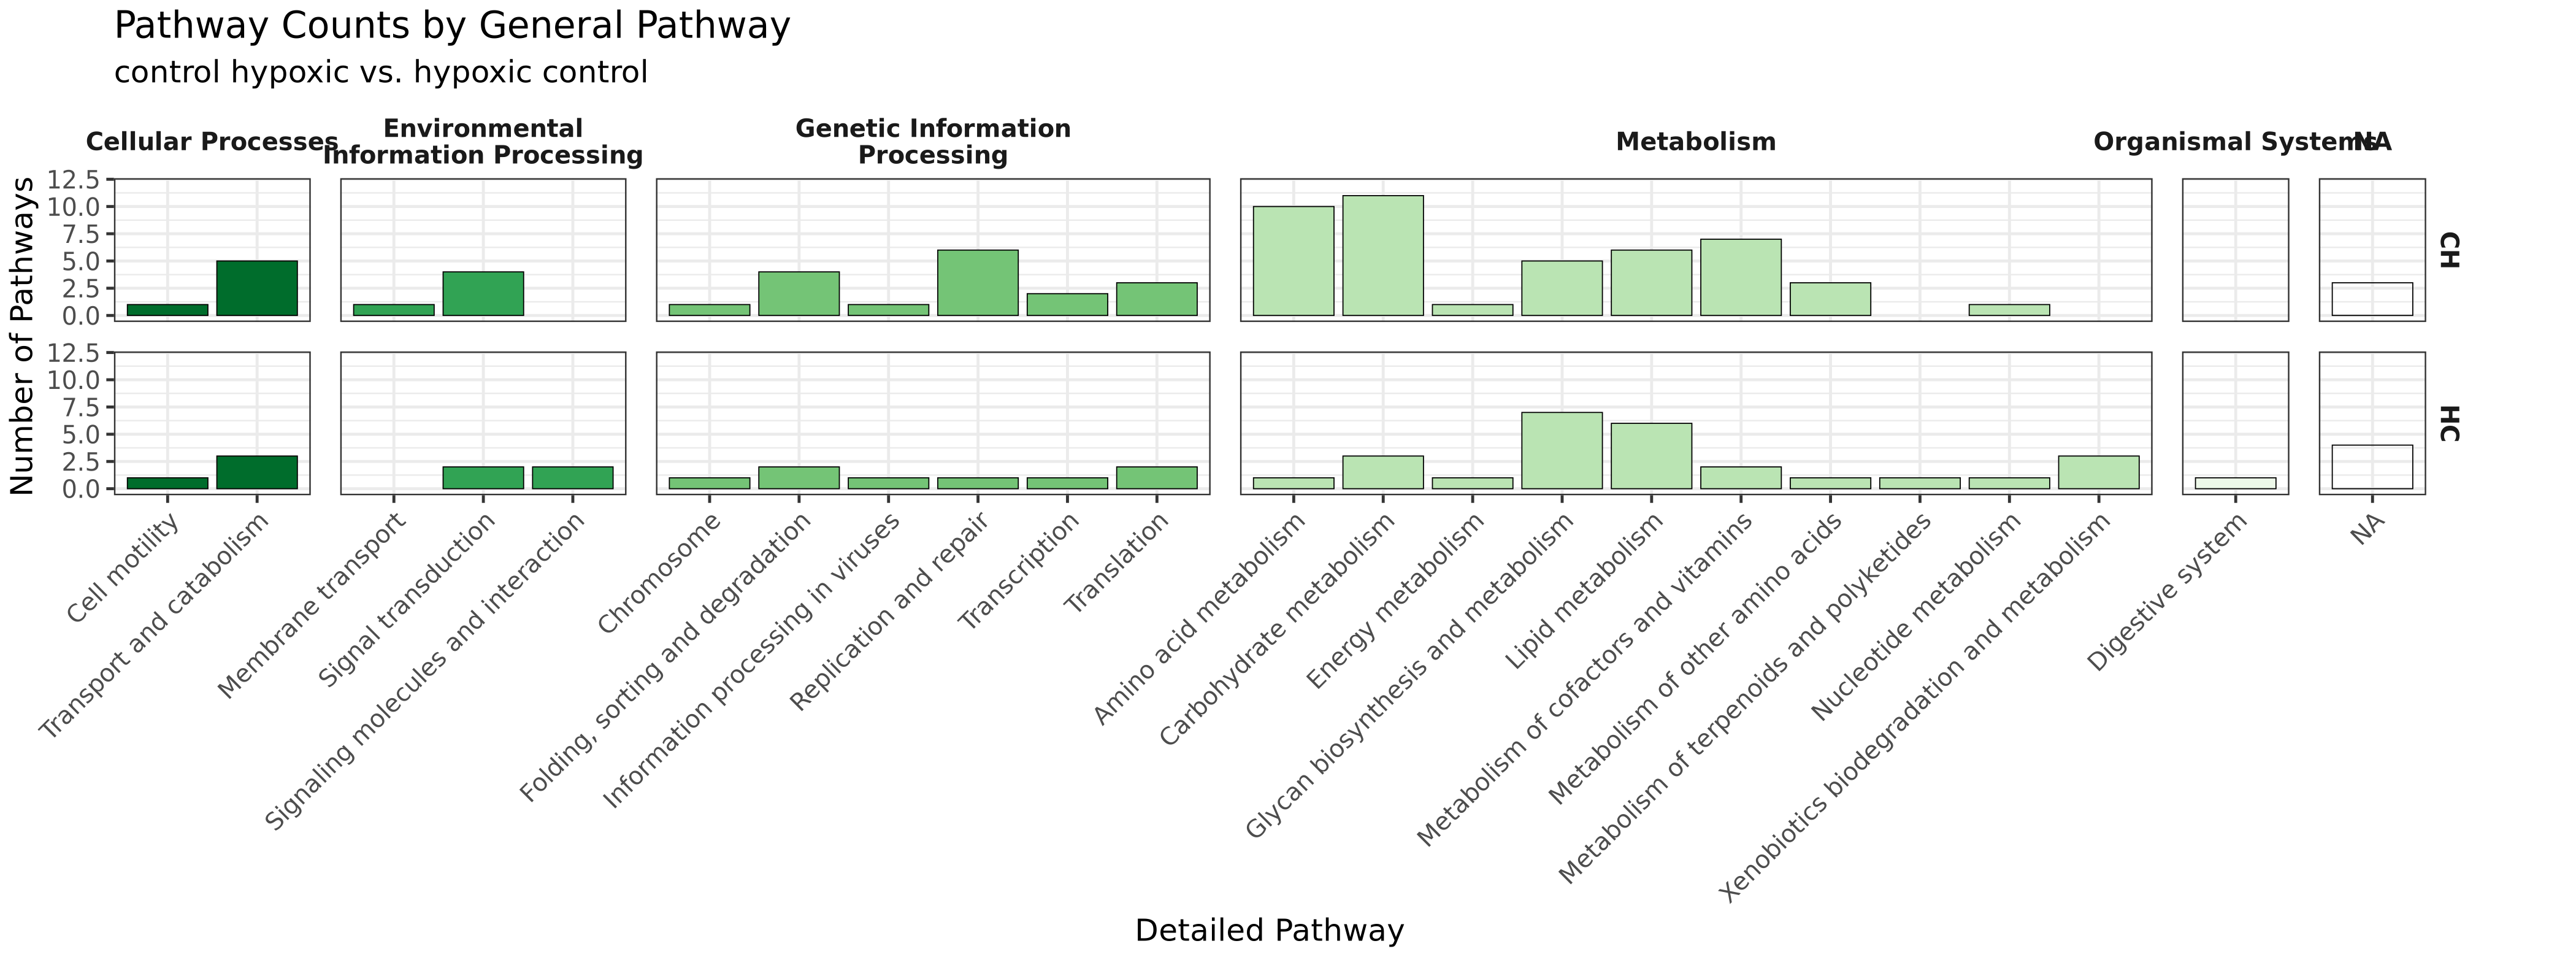

In [23]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= CH_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Greens', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control hypoxic vs. hypoxic control",
      fill = "General Pathway")

In [24]:
CH_top10$Description

ERROR: Error in eval(expr, envir, enclos): object 'CH_top10' not found


**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

,X,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5930271,0.6780874,Metabolism,Lipid metabolism,HC
2,cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6580772,0.6780874,Metabolism,Lipid metabolism,HC
3,cvn00450,cvn00450,Selenocompound metabolism,-0.6570291,0.6780874,Metabolism,Metabolism of other amino acids,CH
4,cvn00980,cvn00980,Metabolism of xenobiotics by cytochrome P450,0.5629852,0.6780874,Metabolism,Xenobiotics biodegradation and metabolism,HC
5,cvn00270,cvn00270,Cysteine and methionine metabolism,-0.4700245,0.6780874,Metabolism,Amino acid metabolism,CH
6,cvn00670,cvn00670,One carbon pool by folate,-0.5313855,0.6780874,Metabolism,Metabolism of cofactors and vitamins,CH
7,cvn00591,cvn00591,Linoleic acid metabolism,0.5816608,0.6780874,Metabolism,Lipid metabolism,HC
8,cvn00040,cvn00040,Pentose and glucuronate interconversions,-0.5880763,0.6780874,Metabolism,Carbohydrate metabolism,CH
9,cvn00630,cvn00630,Glyoxylate and dicarboxylate metabolism,-0.4497011,0.6780874,Metabolism,Carbohydrate metabolism,CH


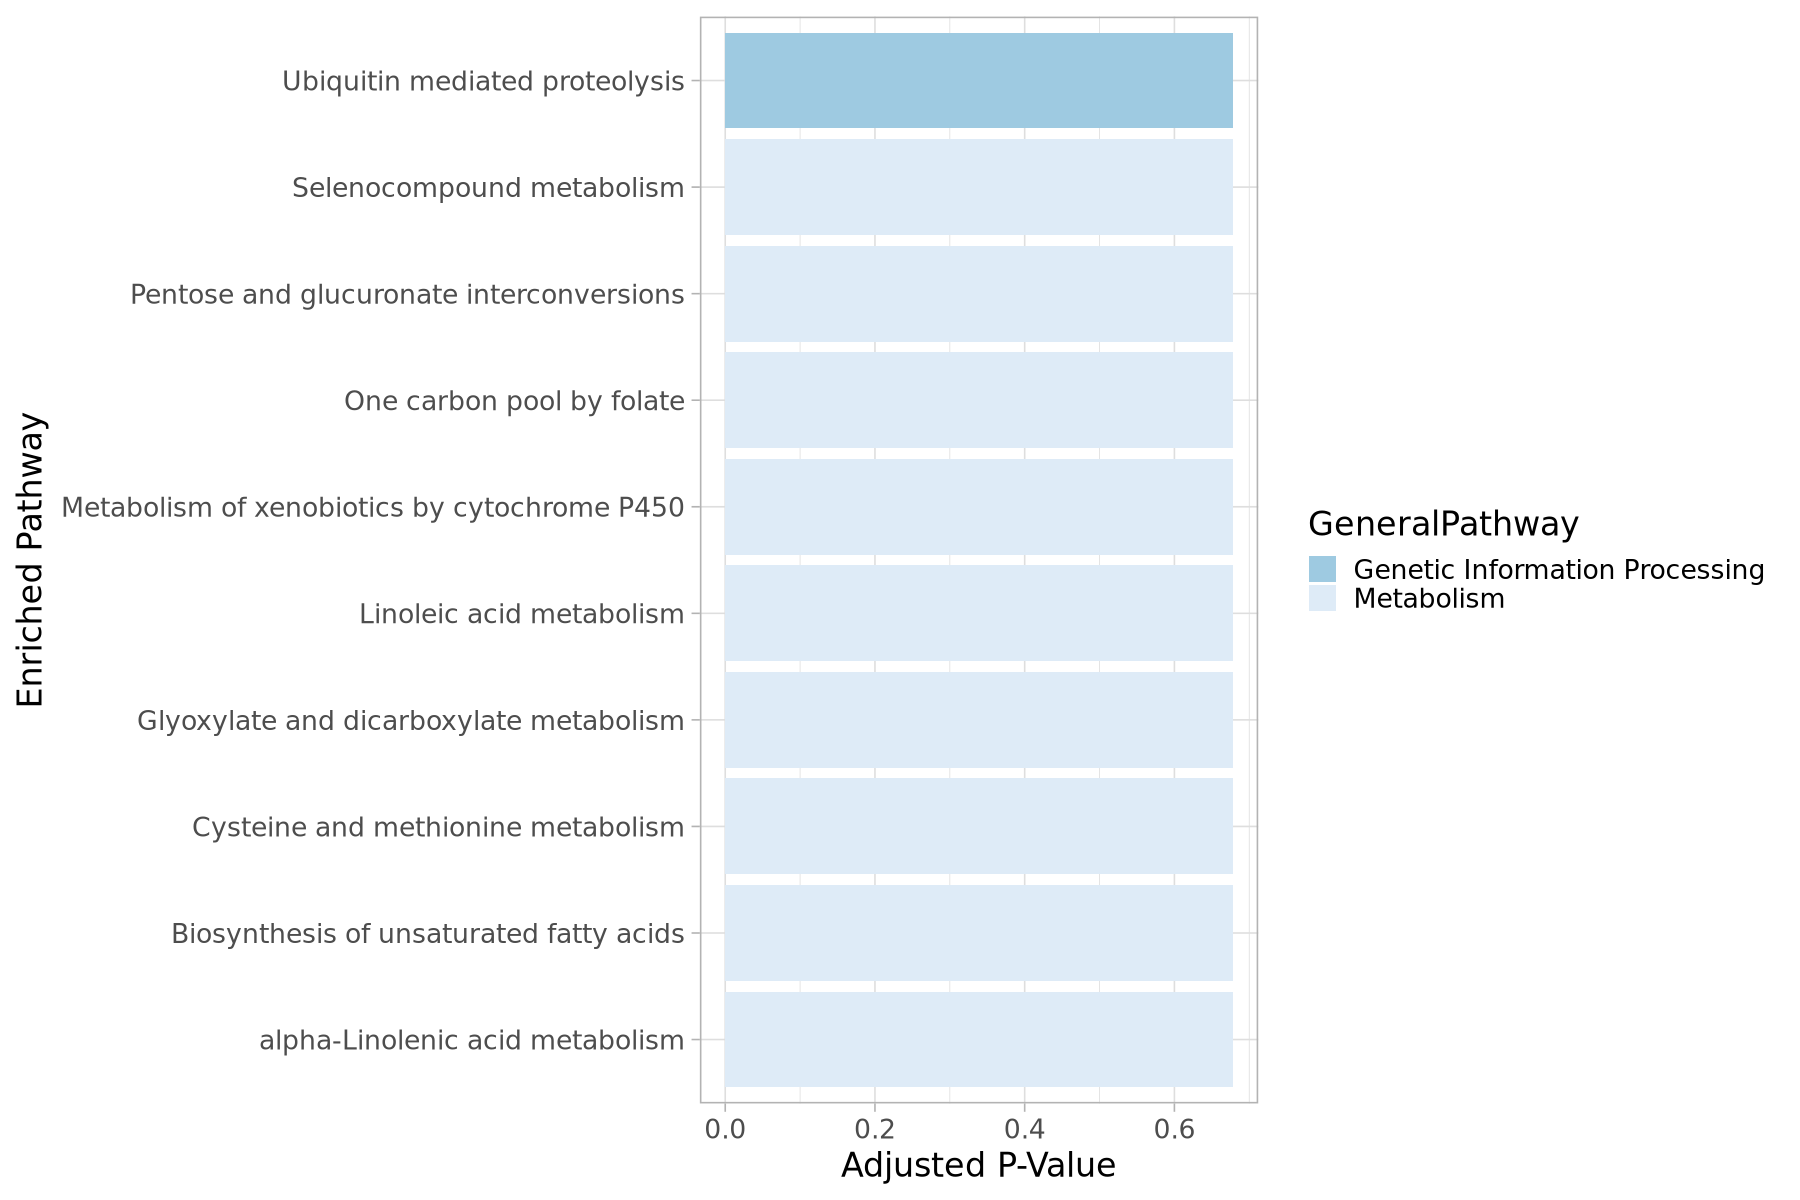

In [25]:
options(repr.plot.width=15, repr.plot.height=10)

CH_top10 <- head(CH_df[order(CH_df$p.adjust), ], 10)
CH_top10

ggplot(CH_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

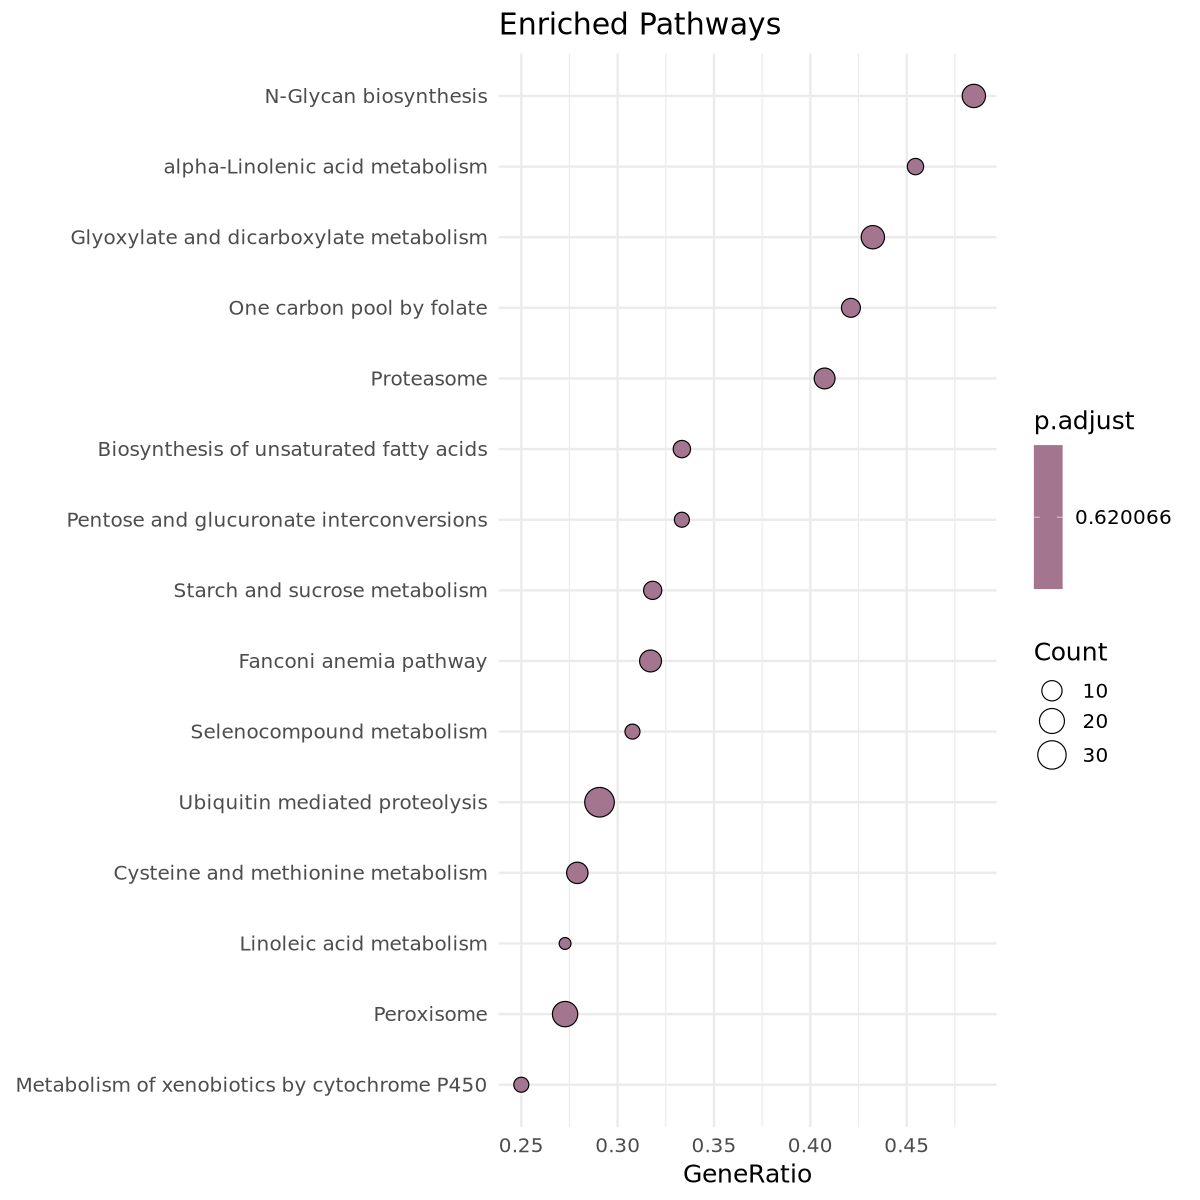

In [26]:
options(repr.plot.width=10, repr.plot.height=10)

CH_kk2@result$Description <- gsub(CH_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(CH_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance


## hypoxic hypoxic vs. hypoxic control
HH vs. HC

In [27]:
head(HH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,-0.15734693,0.2305386,0.0000000,1.000000,NA
2,LOC111109452,1.5973302,0.33129064,0.2600342,0.3126152,0.754573,NA
3,LOC111124802,213.0013054,-0.07669030,0.1125398,0.0000000,1.000000,1
4,LOC111101273,76.7130208,-0.06379838,0.1495362,0.0000000,1.000000,1
5,LOC111101250,123.4748149,-0.04446060,0.1737339,0.0000000,1.000000,1
6,LOC111101262,269.4443993,-0.07196657,0.1174022,0.0000000,1.000000,1


formatting the df as needed to run KEGG

In [28]:
# selecting columns I need
hh_hc <- select(HH_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
hh_hc$X <- substr(hh_hc$X, start = 4, stop = nchar(hh_hc$X))

# renaming columns
colnames(hh_hc) <- c('gene', 'lfc', 'padj')

head(hh_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111120752,-0.15734693,NA
2,111109452,0.33129064,NA
3,111124802,-0.07669030,1
4,111101273,-0.06379838,1
5,111101250,-0.04446060,1
6,111101262,-0.07196657,1


In [29]:
# creating numeric vector for kegg object
HH_kegg_gene_list <- hh_hc$lfc
names(HH_kegg_gene_list) <- hh_hc$gene

# omitting anything with NA in a cell
HH_kegg_gene_list <- na.omit(HH_kegg_gene_list)

# sort list in descending order
HH_kegg_gene_list = sort(HH_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(HH_kegg_gene_list)
class(HH_kegg_gene_list)

111108235 111119327 111103340 111119407 111109525 111112560 
 2.370191  2.139134  2.109819  2.048889  2.012169  1.980238

[1] "numeric"

now that my gene list looks okay - running KEGG

In [30]:
kegg_organism = 'cvn'
HH_kk2 <- gseKEGG(geneList = HH_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [31]:
HH_kk2_df <- as.data.frame(HH_kk2)
HH_kk2_df$Description <- sub(" -.*", "", HH_kk2_df$Description)
head(HH_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00270,cvn00270,Cysteine and methionine metabolism,43,0.5558442,1.787357,0.001256415,0.1532826,0.1481247,1290,"tags=30%, list=10%, signal=27%",111137596/111135192/111122141/111129934/111136621/111122163/111110831/111130865/111133693/111100699/111106176/111111318/111116065
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,-0.7041848,-1.741554,0.008665035,0.3930408,0.3798151,1928,"tags=73%, list=14%, signal=62%",111123661/111124908/111136438/111136066/111107112/111115744/111113990/111127642
cvn04120,cvn04120,Ubiquitin mediated proteolysis,117,0.3889277,1.477032,0.009664937,0.3930408,0.3798151,2757,"tags=34%, list=20%, signal=27%",111121155/111100396/111104196/111120860/111137343/111099688/111138340/111135325/111119134/111131129/111104637/111129295/111124955/111130310/111105462/111114538/111110185/111120632/111103787/111102530/111105597/111130966/111103790/111123155/111120128/111103271/111121135/111120086/111128926/111129467/111132898/111104077/111133998/111121443/111100417/111128564/111103982/111136470/111129365/111126002
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,-0.5944713,-1.666586,0.014274221,0.4353637,0.4207139,1920,"tags=50%, list=14%, signal=43%",111124908/111136438/111136066/111131209/111107112/111115744/111119293/111113990/111129730
cvn03082,cvn03082,ATP-dependent chromatin remodeling,70,-0.3726363,-1.419241,0.019716053,0.4810717,0.4648838,2952,"tags=40%, list=22%, signal=31%",111118535/111132974/111119035/111135329/111114820/111120915/111136148/111130322/111114842/111099792/111105716/111123066/111125973/111134187/111128754/111118359/111129852/111130152/111128560/111108477/111120594/111120856/111127973/111127274/111114783/111128559/111105834/111133731
cvn00591,cvn00591,Linoleic acid metabolism,11,-0.6267923,-1.550151,0.041003696,0.5175920,0.5001752,369,"tags=36%, list=3%, signal=35%",111123661/111127589/111127642/111127588


In [43]:
top10_HH <- head(HH_kk2_df[order(HH_kk2_df$pvalue), ], 10)
top10_HH

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00270,cvn00270,Cysteine and methionine metabolism,43,0.5558442,1.787357,0.001256415,0.1532826,0.1481247,1290,"tags=30%, list=10%, signal=27%",111137596/111135192/111122141/111129934/111136621/111122163/111110831/111130865/111133693/111100699/111106176/111111318/111116065
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,-0.7041848,-1.741554,0.008665035,0.3930408,0.3798151,1928,"tags=73%, list=14%, signal=62%",111123661/111124908/111136438/111136066/111107112/111115744/111113990/111127642
cvn04120,cvn04120,Ubiquitin mediated proteolysis,117,0.3889277,1.477032,0.009664937,0.3930408,0.3798151,2757,"tags=34%, list=20%, signal=27%",111121155/111100396/111104196/111120860/111137343/111099688/111138340/111135325/111119134/111131129/111104637/111129295/111124955/111130310/111105462/111114538/111110185/111120632/111103787/111102530/111105597/111130966/111103790/111123155/111120128/111103271/111121135/111120086/111128926/111129467/111132898/111104077/111133998/111121443/111100417/111128564/111103982/111136470/111129365/111126002
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,-0.5944713,-1.666586,0.014274221,0.4353637,0.4207139,1920,"tags=50%, list=14%, signal=43%",111124908/111136438/111136066/111131209/111107112/111115744/111119293/111113990/111129730
cvn03082,cvn03082,ATP-dependent chromatin remodeling,70,-0.3726363,-1.419241,0.019716053,0.4810717,0.4648838,2952,"tags=40%, list=22%, signal=31%",111118535/111132974/111119035/111135329/111114820/111120915/111136148/111130322/111114842/111099792/111105716/111123066/111125973/111134187/111128754/111118359/111129852/111130152/111128560/111108477/111120594/111120856/111127973/111127274/111114783/111128559/111105834/111133731
cvn04068,cvn04068,FoxO signaling pathway,66,0.4081513,1.426920,0.027745436,0.5175920,0.5001752,2579,"tags=38%, list=19%, signal=31%",111104196/111119905/111103474/111130138/111100287/111125223/111121839/111112940/111134713/111119108/111105462/111118834/111120632/111134249/111128906/111120947/111121739/111102390/111121135/111107163/111128744/111121109/111131500/111121740/111112841
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,57,0.4319045,1.475940,0.033384024,0.5175920,0.5001752,2179,"tags=33%, list=16%, signal=28%",111121480/111128153/111132055/111128132/111102803/111133163/111102690/111123620/111130755/111119695/111120056/111128265/111128176/111121773/111118815/111110086/111122907/111119458/111121217
cvn00510,cvn00510,N-Glycan biosynthesis,33,-0.4415968,-1.446576,0.034201149,0.5175920,0.5001752,2678,"tags=39%, list=20%, signal=32%",111101820/111119558/111113415/111124588/111136555/111101197/111122131/111124498/111121994/111134828/111137033/111136571/111126213
cvn00591,cvn00591,Linoleic acid metabolism,11,-0.6267923,-1.550151,0.041003696,0.5175920,0.5001752,369,"tags=36%, list=3%, signal=35%",111123661/111127589/111127642/111127588


In [44]:
select(top10_HH, Description, pvalue, p.adjust)

,Description,pvalue,p.adjust
,<chr>,<dbl>,<dbl>
cvn00270,Cysteine and methionine metabolism,0.001256415,0.1532826
cvn00592,alpha-Linolenic acid metabolism,0.008665035,0.3930408
cvn04120,Ubiquitin mediated proteolysis,0.009664937,0.3930408
cvn01040,Biosynthesis of unsaturated fatty acids,0.014274221,0.4353637
cvn03082,ATP-dependent chromatin remodeling,0.019716053,0.4810717
cvn04068,FoxO signaling pathway,0.027745436,0.5175920
cvn03008,Ribosome biogenesis in eukaryotes,0.033384024,0.5175920
cvn00510,N-Glycan biosynthesis,0.034201149,0.5175920
cvn00591,Linoleic acid metabolism,0.041003696,0.5175920


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(HH_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [32]:
HH_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_HH_HC.csv')

okay so all of these KEGG bar plots are the exact same - since my input for all of them contain the same genes, just different LFC numbers, this makes sense - i'm not telling it to look at which pair has more enrichment of a pathway - but I'm not sure that I can correctly do that anyway, since methylation data doesn't necessarily tell us a direction - just that there are more differentially methylated geenes in a certain direction (but we don't know if that's 'good'/'bad', something becoming unmethylated is just as important as becoming more methylated) - DESeq only tells me that there were changes, not that there was for sure more methylation in one treatment (CC could become unmethylated, which would show up as more methylation for HC) ... things to think about with this analysis

In [33]:
# making sure R see enrichment score as a number
HH_df$enrichmentScore <- as.numeric(HH_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
HH_df$direction <- ifelse(HH_df$enrichmentScore<0, "HH", #neg ES = pathway for control
                              ifelse(HH_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(HH_df)

,X,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,cvn00270,cvn00270,Cysteine and methionine metabolism,0.5558442,0.2113401,Metabolism,Amino acid metabolism,HC
2,cvn00592,cvn00592,alpha-Linolenic acid metabolism,-0.7041848,0.3964536,Metabolism,Lipid metabolism,HH
3,cvn04120,cvn04120,Ubiquitin mediated proteolysis,0.3889277,0.3964536,Genetic Information Processing,"Folding, sorting and degradation",HC
4,cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,-0.5944713,0.4566695,Metabolism,Lipid metabolism,HH
5,cvn00591,cvn00591,Linoleic acid metabolism,-0.6267923,0.4674330,Metabolism,Lipid metabolism,HH
6,cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,0.4319045,0.4674330,Genetic Information Processing,Translation,HC


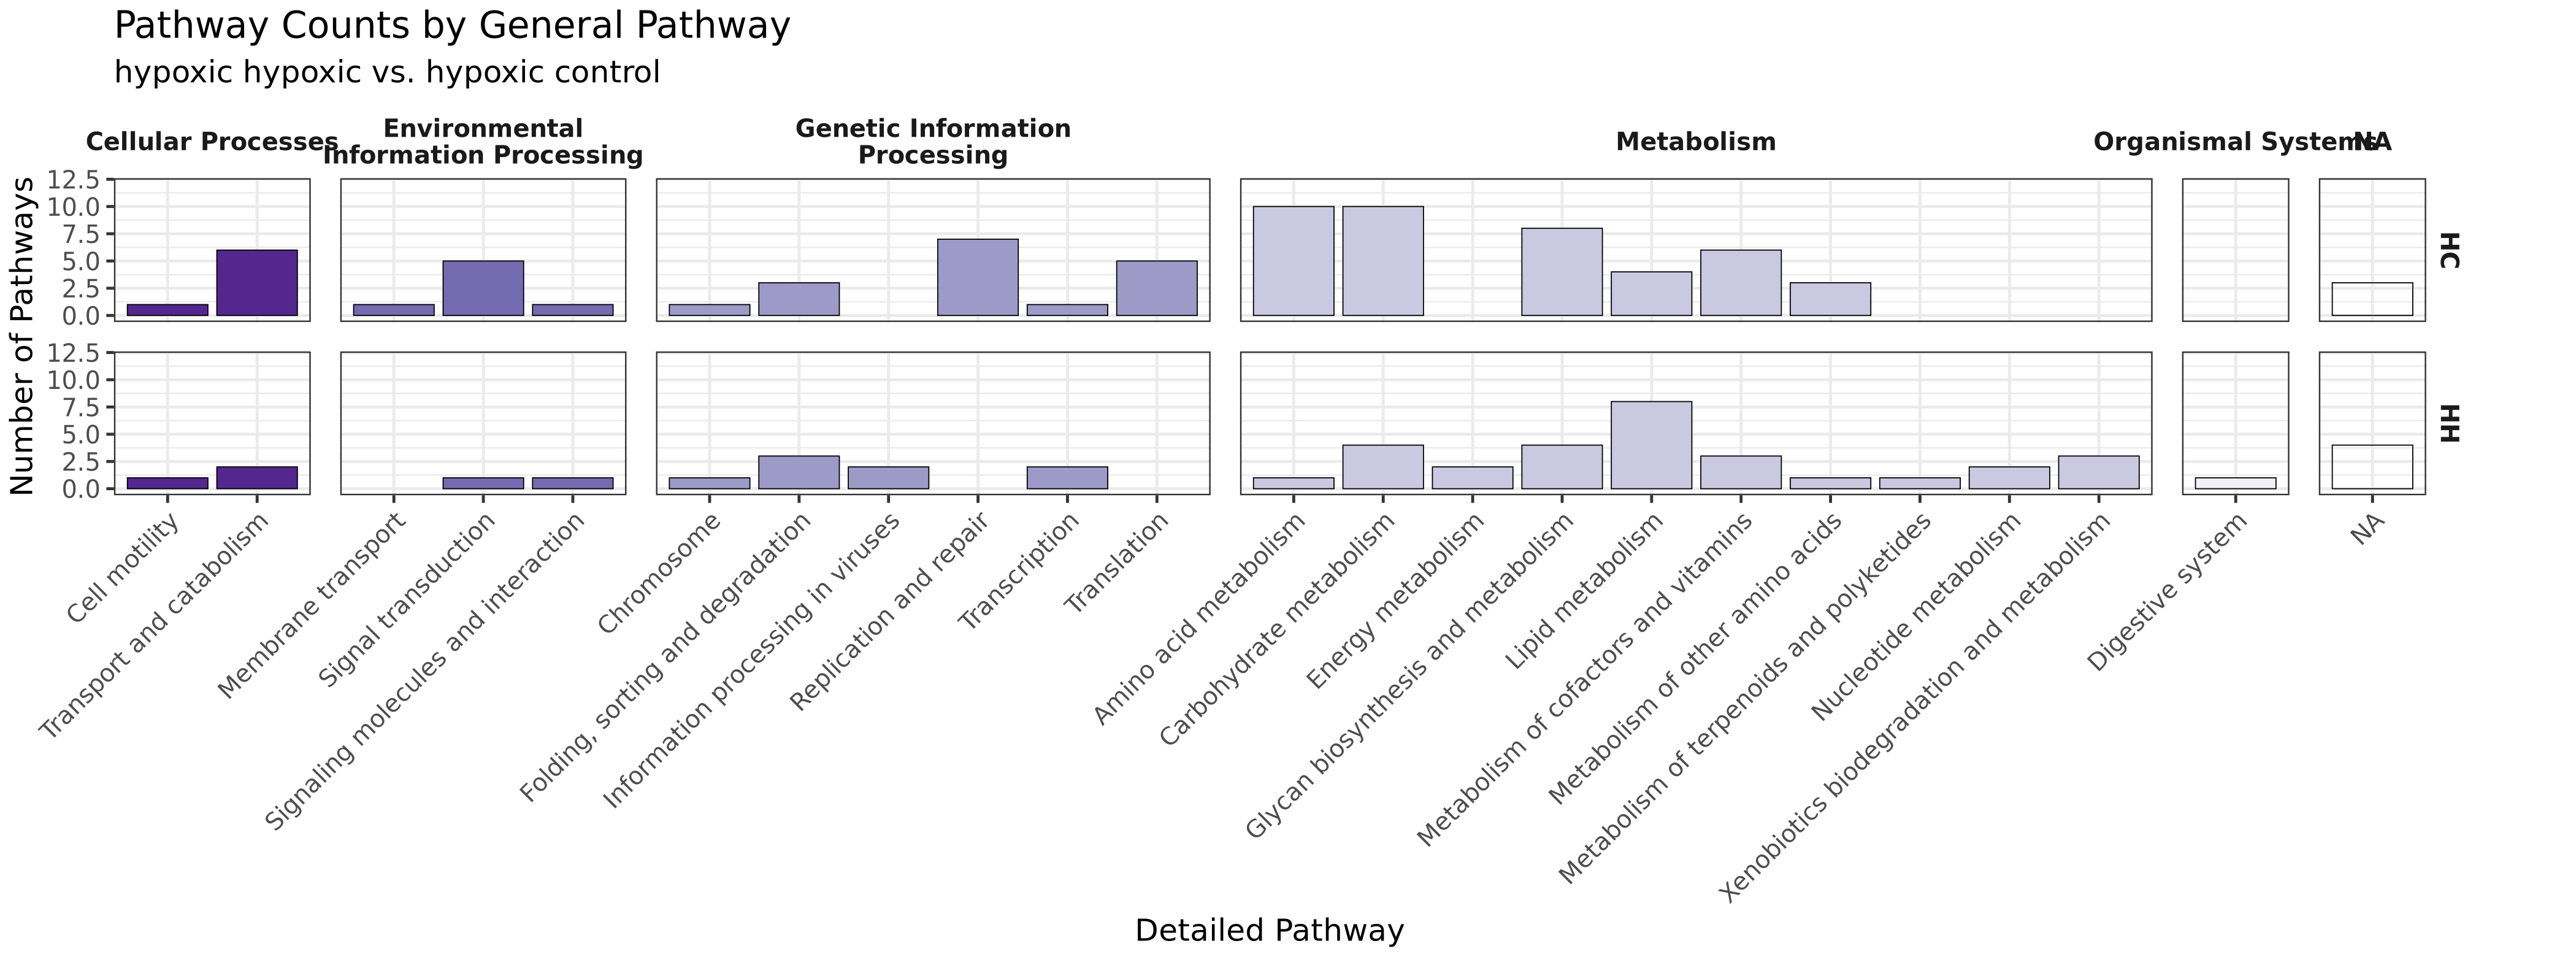

In [34]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= HH_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Purples', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "hypoxic hypoxic vs. hypoxic control",
      fill = "General Pathway")

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

,X,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,cvn00270,cvn00270,Cysteine and methionine metabolism,0.5558442,0.2113401,Metabolism,Amino acid metabolism,HC
2,cvn00592,cvn00592,alpha-Linolenic acid metabolism,-0.7041848,0.3964536,Metabolism,Lipid metabolism,HH
3,cvn04120,cvn04120,Ubiquitin mediated proteolysis,0.3889277,0.3964536,Genetic Information Processing,"Folding, sorting and degradation",HC
4,cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,-0.5944713,0.4566695,Metabolism,Lipid metabolism,HH
5,cvn00591,cvn00591,Linoleic acid metabolism,-0.6267923,0.4674330,Metabolism,Lipid metabolism,HH
6,cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,0.4319045,0.4674330,Genetic Information Processing,Translation,HC
7,cvn00260,cvn00260,"Glycine, serine and threonine metabolism",0.4743631,0.4674330,Metabolism,Amino acid metabolism,HC
8,cvn03060,cvn03060,Protein export,0.5596599,0.4674330,Genetic Information Processing,"Folding, sorting and degradation",HC
9,cvn00510,cvn00510,N-Glycan biosynthesis,-0.4415968,0.4674330,Metabolism,Glycan biosynthesis and metabolism,HH


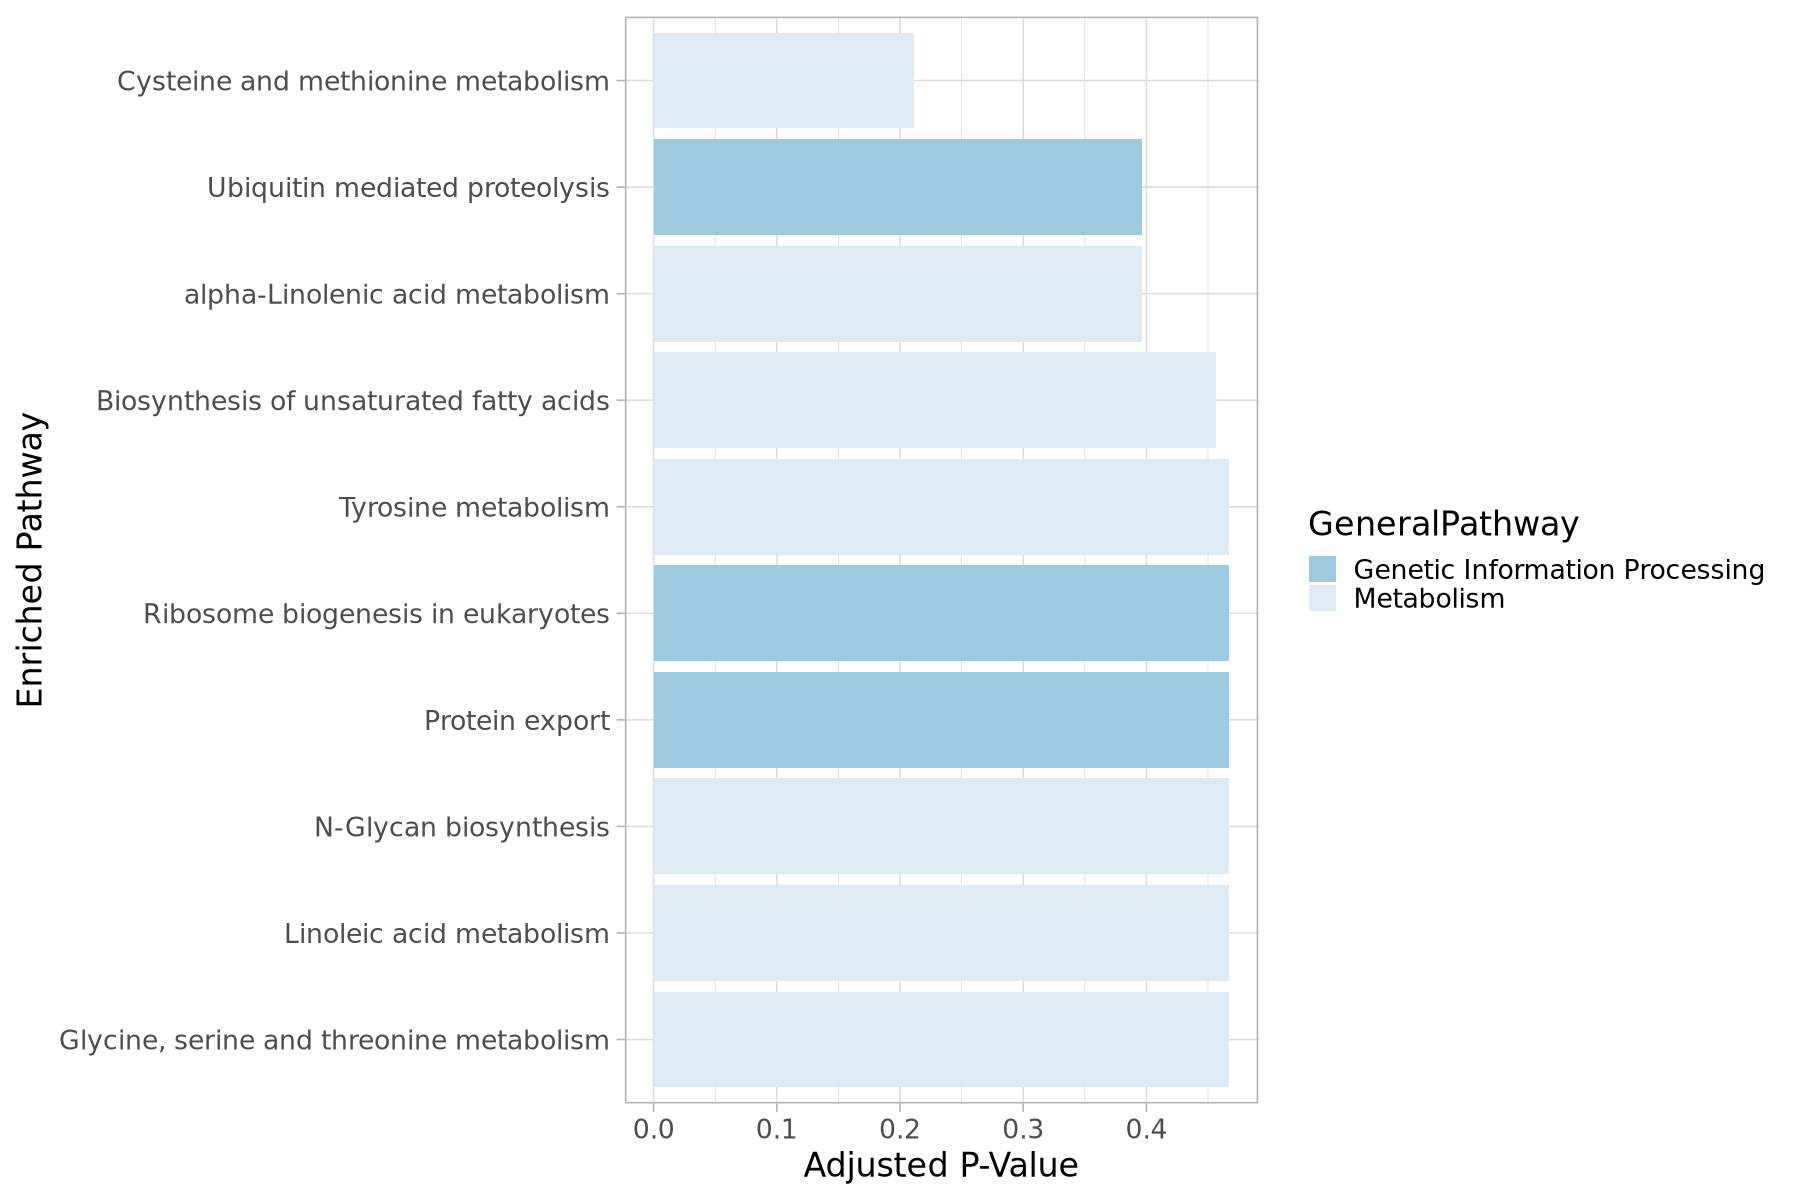

In [35]:
options(repr.plot.width=15, repr.plot.height=10)

HH_top10 <- head(HH_df[order(HH_df$p.adjust), ], 10)
HH_top10

ggplot(HH_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

In [36]:
HH_top10$Description

[1] "Cysteine and methionine metabolism"      
 [2] "alpha-Linolenic acid metabolism"         
 [3] "Ubiquitin mediated proteolysis"          
 [4] "Biosynthesis of unsaturated fatty acids" 
 [5] "Linoleic acid metabolism"                
 [6] "Ribosome biogenesis in eukaryotes"       
 [7] "Glycine, serine and threonine metabolism"
 [8] "Protein export"                          
 [9] "N-Glycan biosynthesis"                   
[10] "Tyrosine metabolism"

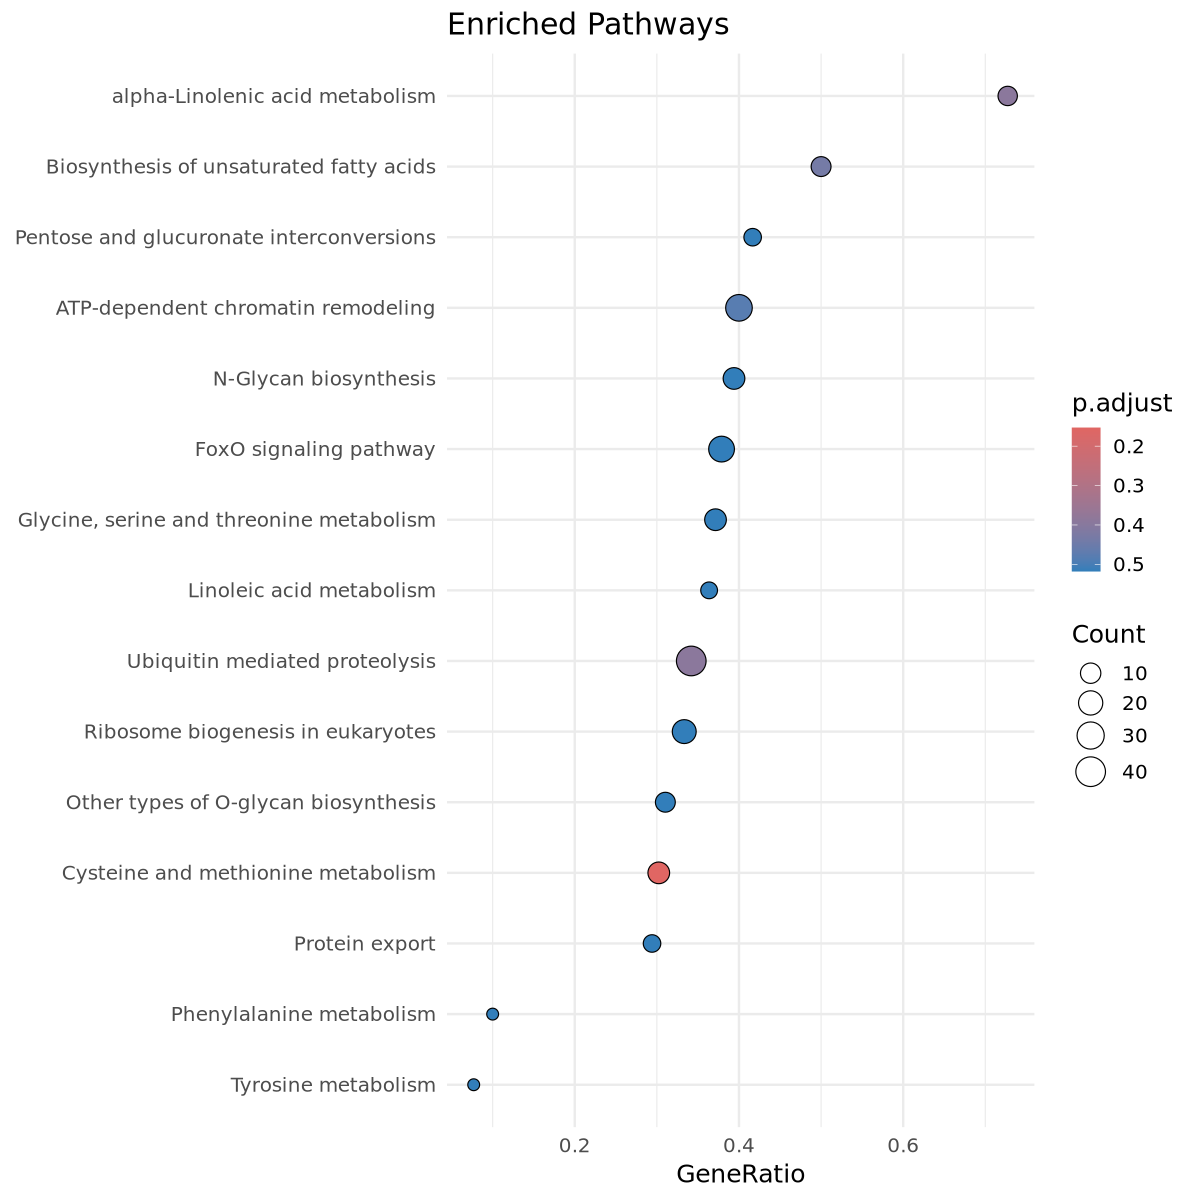

In [37]:
options(repr.plot.width=10, repr.plot.height=10)

HH_kk2@result$Description <- gsub(HH_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(HH_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance
